In [12]:
path = 'input_dec8.txt'

with open(path,mode='r') as file:
    data = file.read()
split = data.split()

split[0]

row = []
for s in split[0]:
    row.append(s)
    
row


lines = []
for i in range(len(split)):
    num_row = []
    for s in split[i]:
        num_row.append(int(s))
    lines.append(num_row)

len(lines[0])

#lines[0]

#data = data.strip('\n')

99

In [13]:
#create matrix
import numpy as np
mat = np.array(lines)
mat = np.matrix(mat)
mat.item((98,98))

2

In [2]:
#test data
test = np.mat([[3,0,3,7,3],[2,5,5,1,2],[6,5,3,3,2],[3,3,5,4,9],[3,5,3,9,0]])
test

matrix([[3, 0, 3, 7, 3],
        [2, 5, 5, 1, 2],
        [6, 5, 3, 3, 2],
        [3, 3, 5, 4, 9],
        [3, 5, 3, 9, 0]])

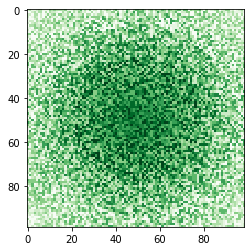

In [14]:
#heatmap visual of the forrest
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(mat, cmap='Greens', interpolation='nearest')
plt.show()

In [16]:
#create max function because mine isn't working below...
def max_function(list):
    highest_val = 0
    for l in list:
        if l > highest_val:
            highest_val = l
    return highest_val

In [18]:
#part 1
def tree_vis(mat,nrow,ncol):
    counter = nrow + ncol + nrow-2 + ncol - 2 #add on counts for perimeter trees
    for i in range(1,nrow-1): #remove top and bottom rows
        for j in range(1,ncol-1): #remove left-most and right-most
            above = [int(mat.item((x,j))) for x in range(0,i)] #above
            below = [int(mat.item((x,j))) for x in range(i+1,nrow)] #below
            left = [int(mat.item((i,y))) for y in range(0,j)] #left
            right = [int(mat.item((i,y))) for y in range(j+1,ncol)] #right
            max_above = max_function(above)
            max_below = max_function(below)
            max_left = max_function(left)
            max_right = max_function(right)
            if int(mat.item(i,j)) > max_above or int(mat.item(i,j)) > max_below or int(mat.item(i,j)) > max_right or int(mat.item(i,j)) > max_left:
                counter += 1
    return counter

tree_vis(mat,99,99)

1662

In [128]:
#part 2
def tree_view(mat,nrow,ncol):
    all_counts = []
    for i in range(1,nrow-1): #remove peripeheral trees
        for j in range(1,ncol-1): #remove peripheral trees
            tree = mat.item(i,j)
            
            #above calculation
            above = [int(mat.item((x,j))) for x in range(0,i)]
            rev = reversed(above)
            above_count = 0
            for n in rev:
                above_count += 1
                if n >= tree: break

                        
            #below calculation
            below = [int(mat.item((x,j))) for x in range(i+1,nrow)]
            below_count = 0
            for n in below:
                below_count += 1
                if n >= tree: break
                        
            #left calculation
            left = [int(mat.item((i,y))) for y in range(0,j)]
            rev_left = reversed(left)
            left_count = 0
            for n in rev_left:
                left_count += 1
                if n >= tree: break
            
            #right calculation
            right = [int(mat.item((i,y))) for y in range(j+1,ncol)]
            right_count = 0
            for n in right:
                right_count += 1
                if n >= tree: break

            counts = above_count * below_count *left_count * right_count
            all_counts.append(counts)
    return all_counts

output = tree_view(mat,99,99)
max(output)

537600